## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#30 seconds csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [ ]:
df.shape

(1000, 60)

In [ ]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [ ]:
df=df.drop(labels="filename",axis=1)

## Understanding the audio files

In [ ]:
audio_recording="/content/drive/MyDrive/Data/genres_original/metal/metal.00002.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
librosa.load(audio_recording,sr=45600)

(array([-0.02395755, -0.06534459, -0.10698677, ...,  0.08406164,
         0.05741391,  0.        ], dtype=float32),
 45600)

In [ ]:
import IPython
IPython.display.Audio(data,rate=sr)

## Visualising audio files

**Raw wave file plot**

In [ ]:
genre=df['label'].unique()
print(genre)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


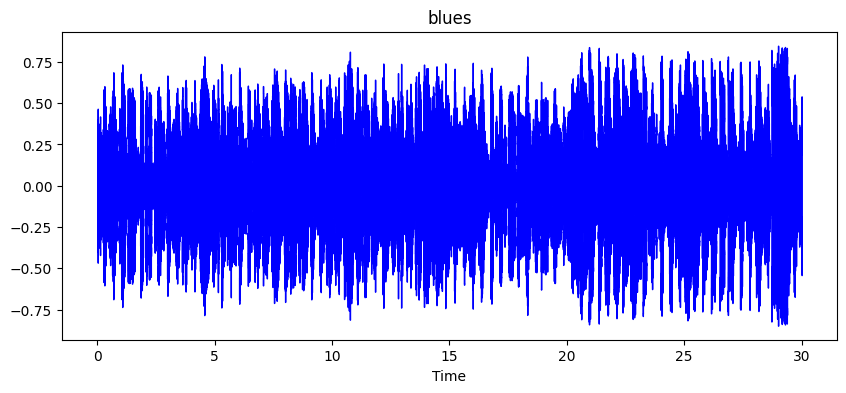

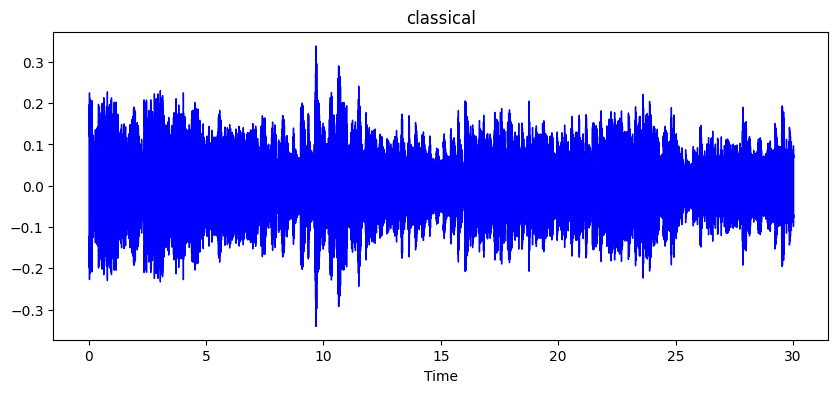

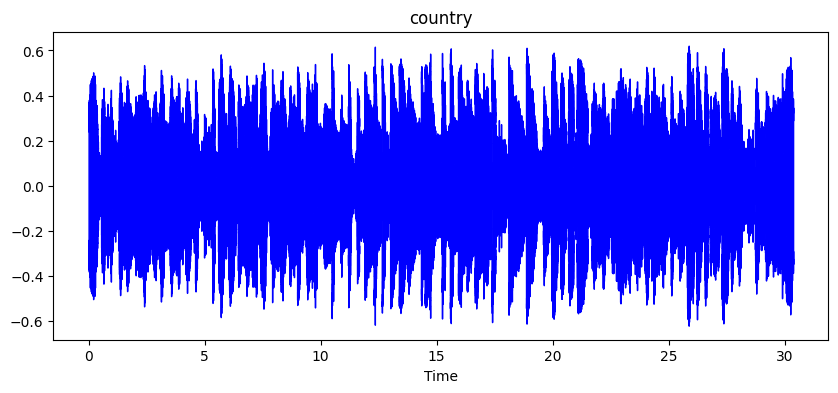

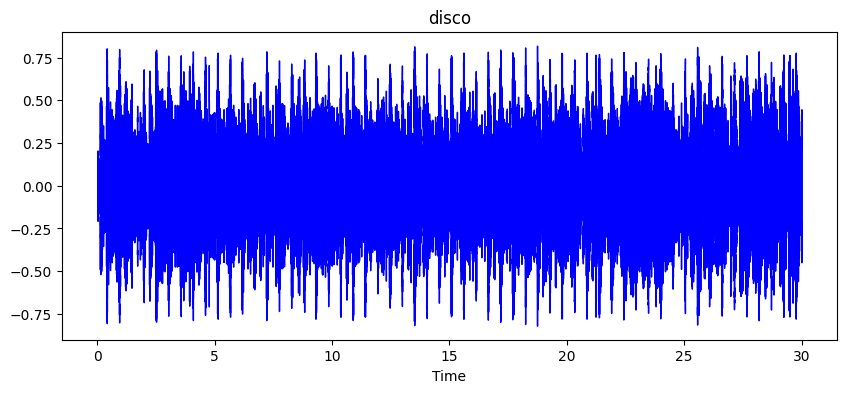

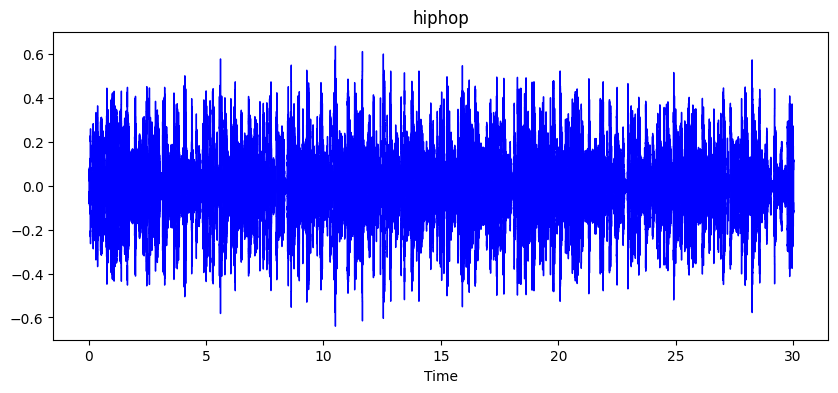

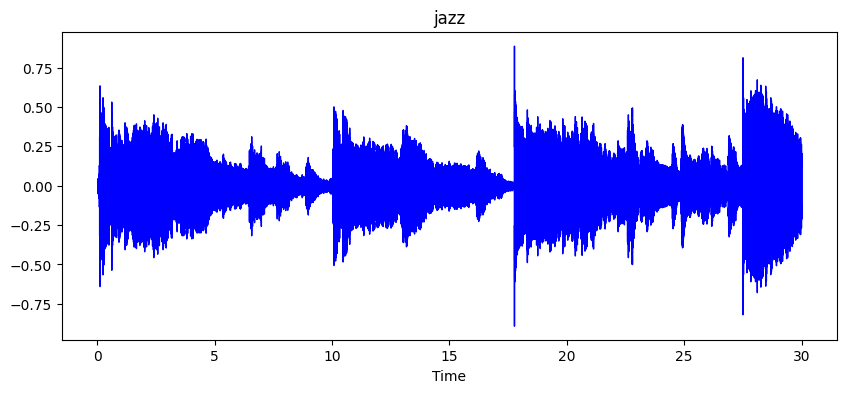

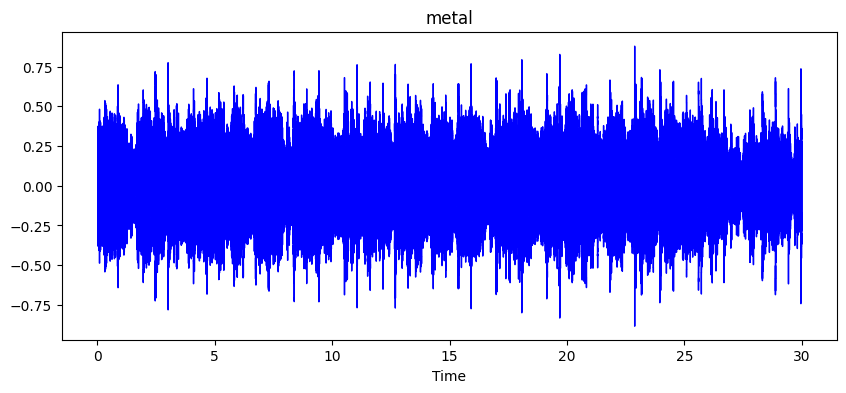

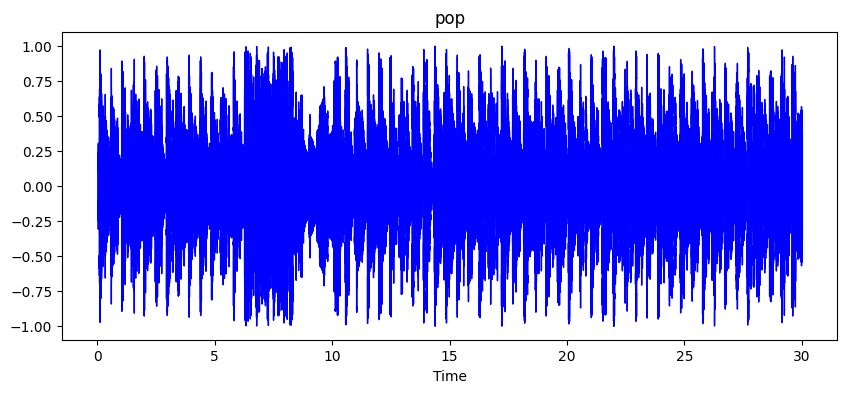

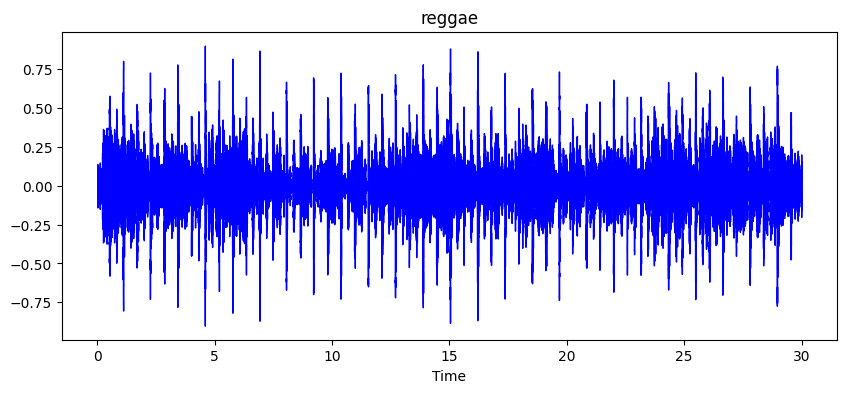

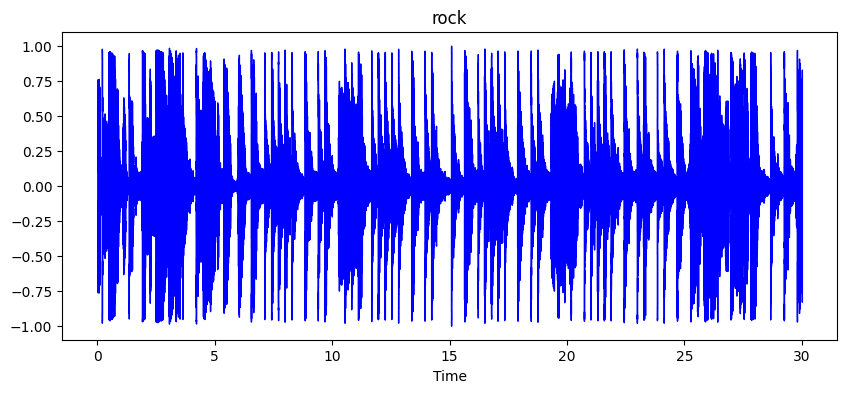

In [ ]:
for i in genre:
    path = f"/content/drive/MyDrive/Data/genres_original/{i}/{i}.00002.wav"
    aud, sr = librosa.load(path)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y=aud, sr=sr, color='b')
    plt.title(i)  # Use 'i' as the title
    plt.show()

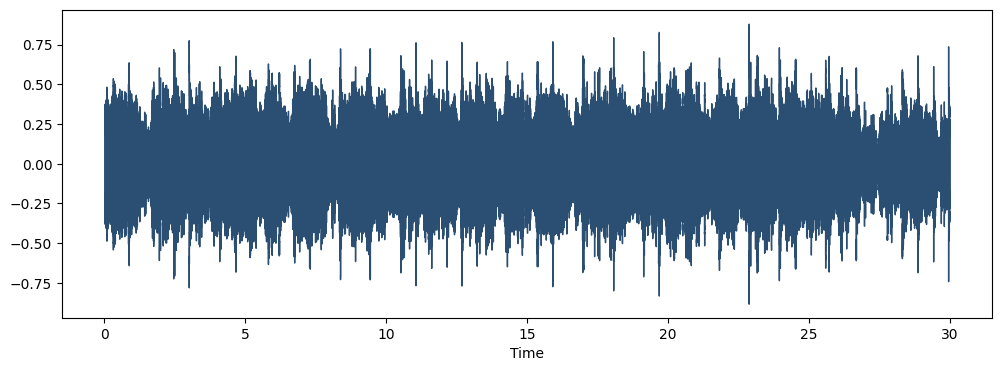

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color="#2B4F72")
plt.show()

**Spectogram**

<ipython-input-13-f5bd7a2d10e7>:7: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz',cmap='viridis')


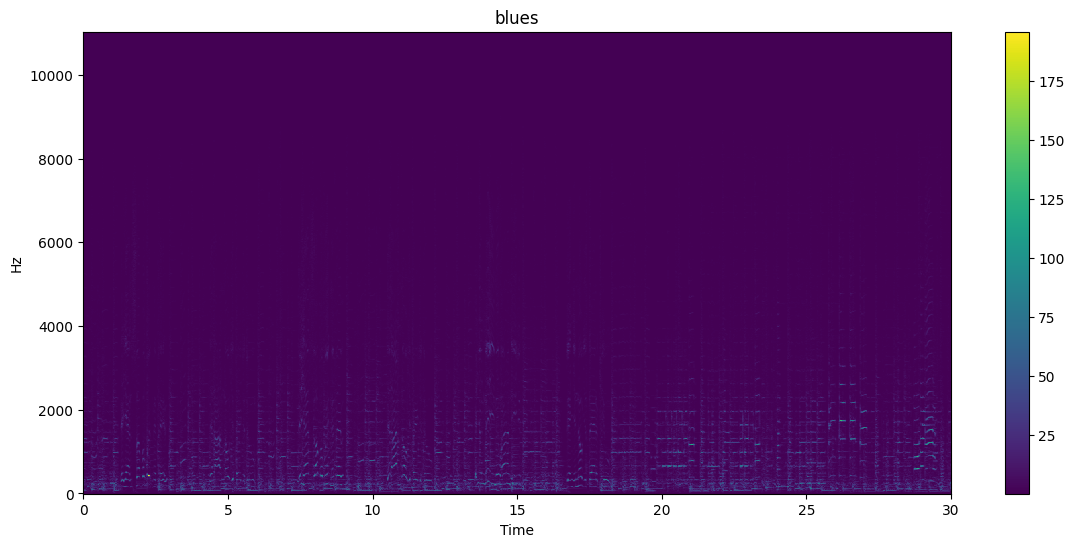

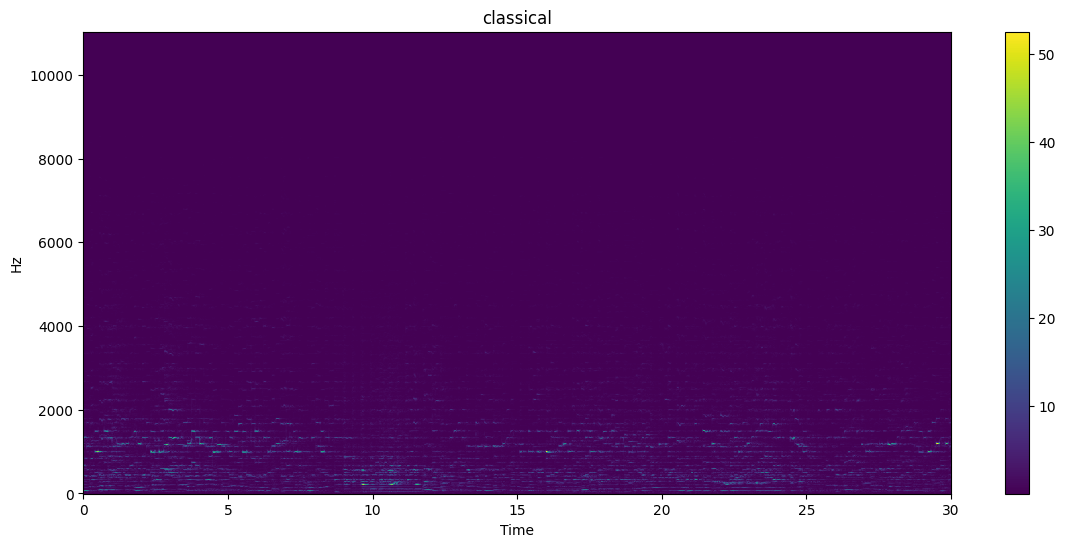

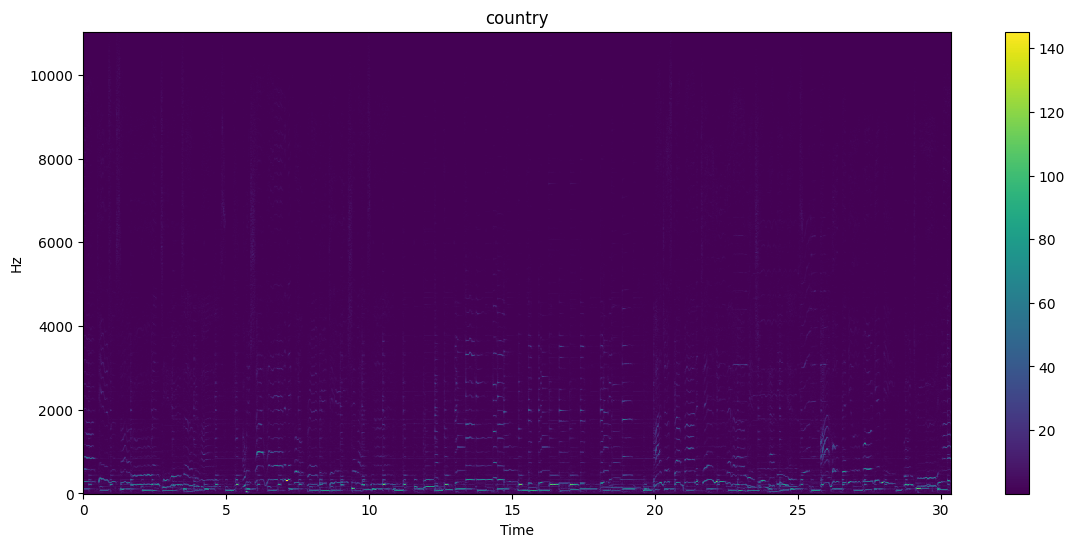

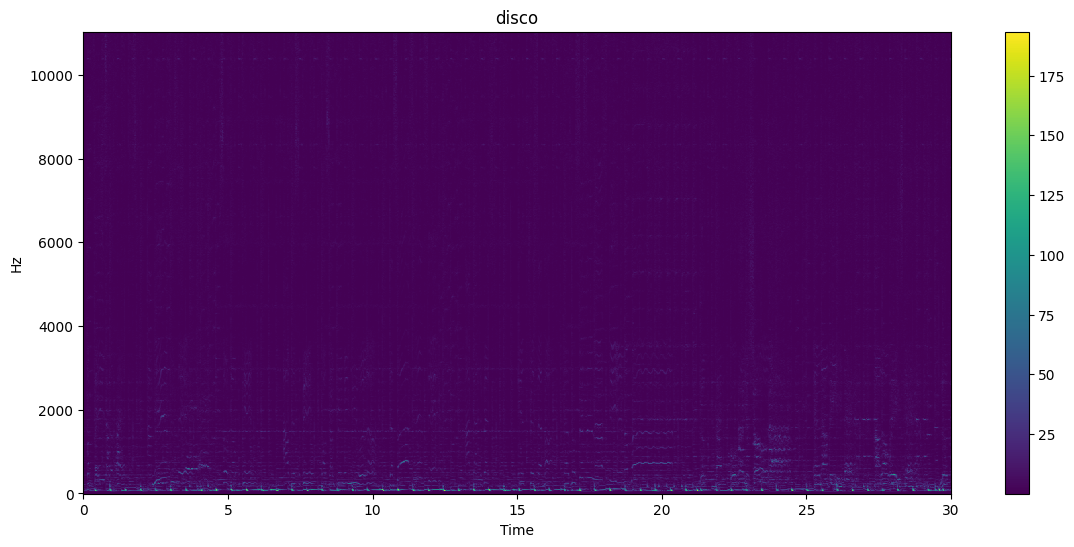

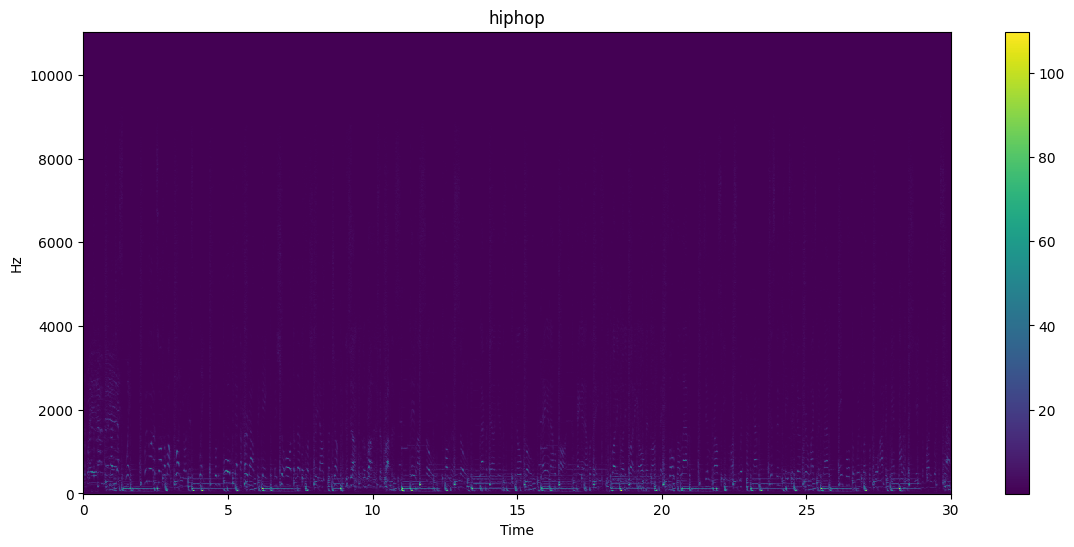

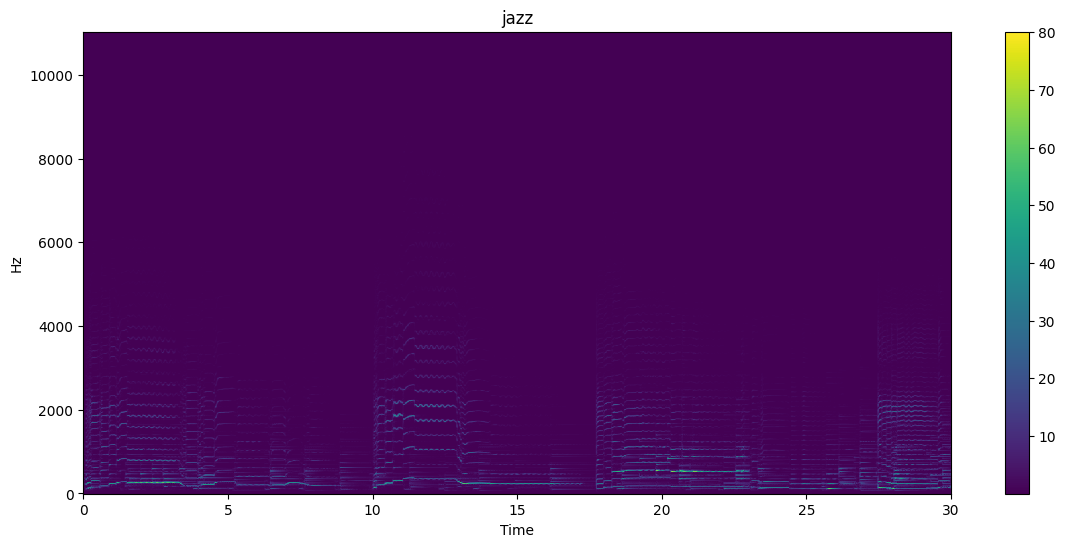

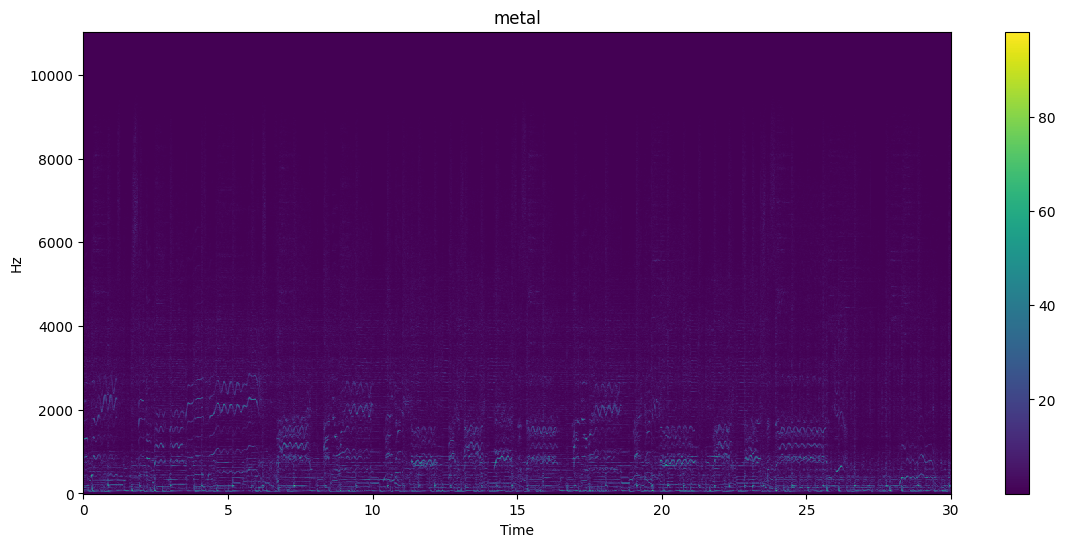

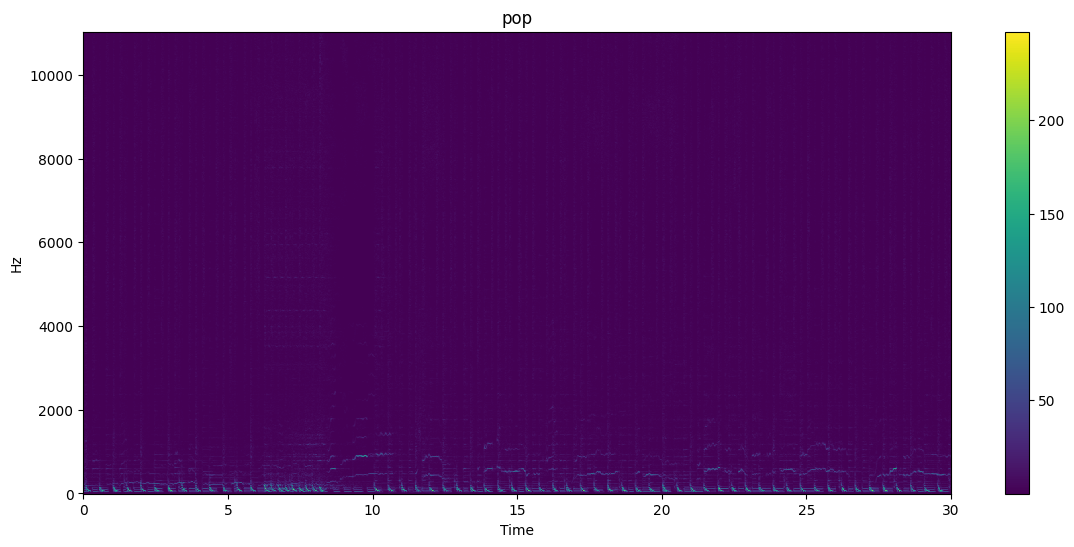

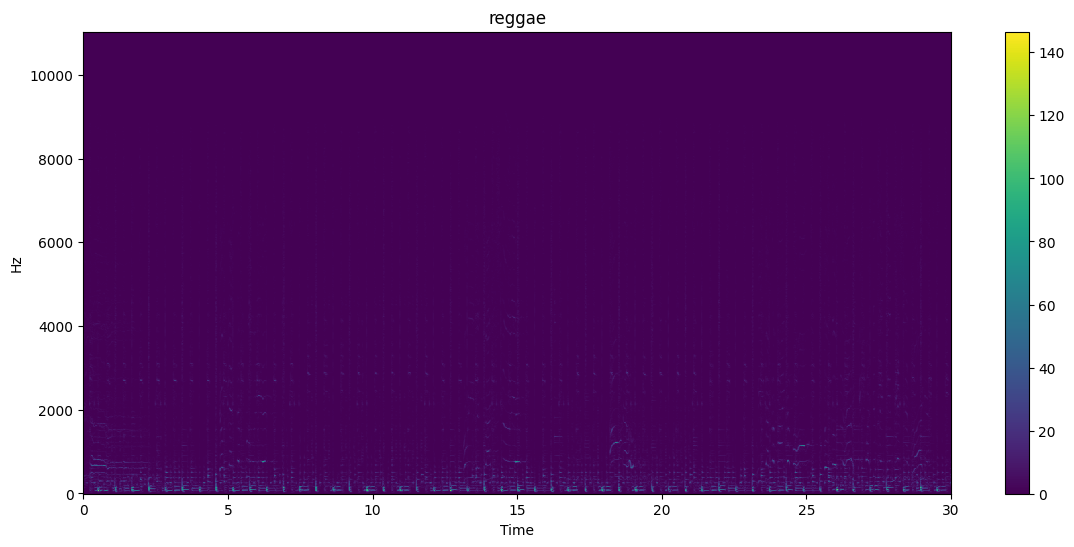

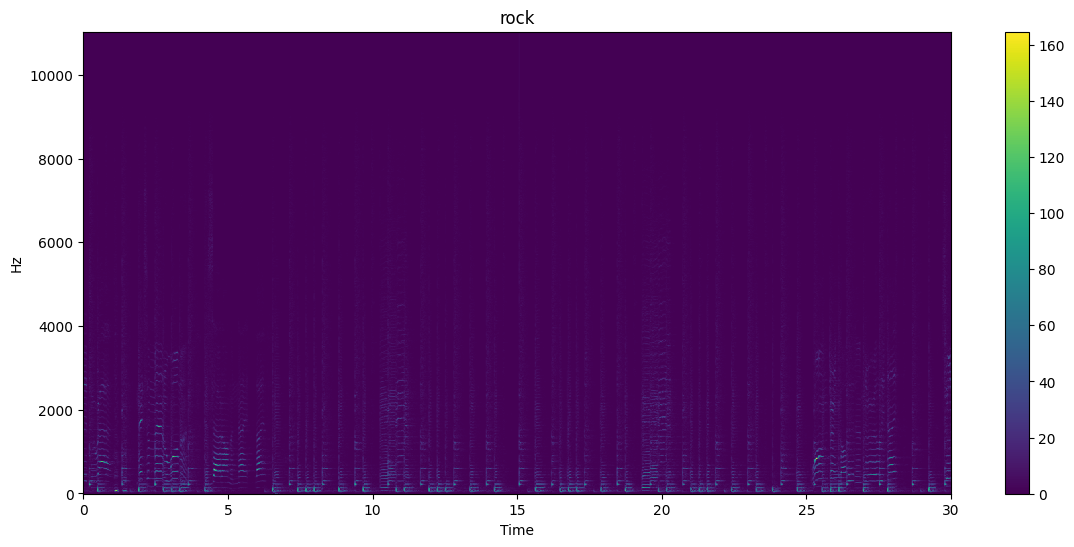

In [ ]:
for i in genre:
    path = f"/content/drive/MyDrive/Data/genres_original/{i}/{i}.00002.wav"
    aud, sr = librosa.load(path)
    stft=librosa.stft(aud)
    stft_db=librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize=(14,6))
    librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz',cmap='viridis')
    plt.colorbar()
    plt.title(i)

**Spectral roll off**

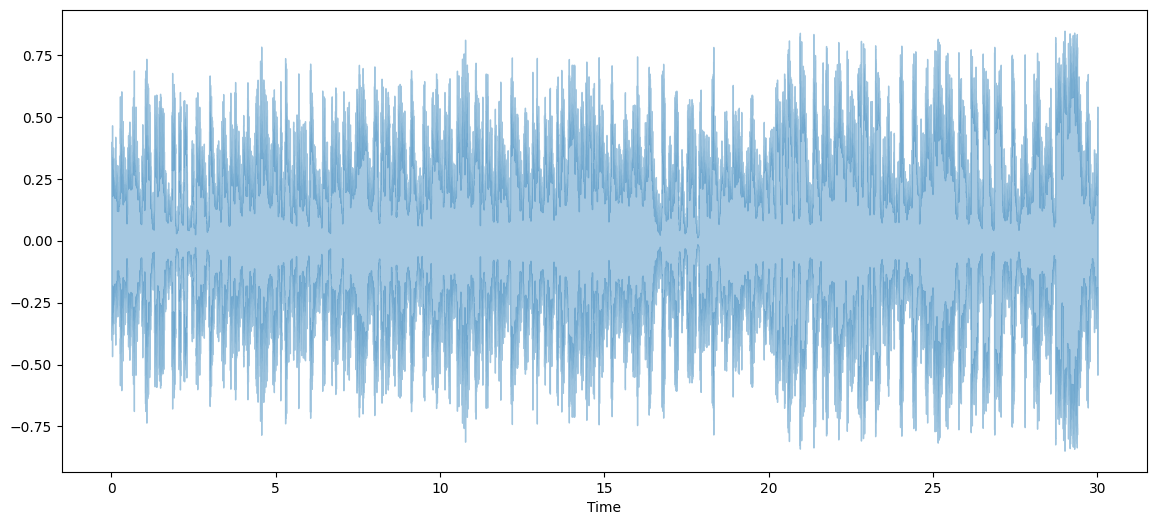

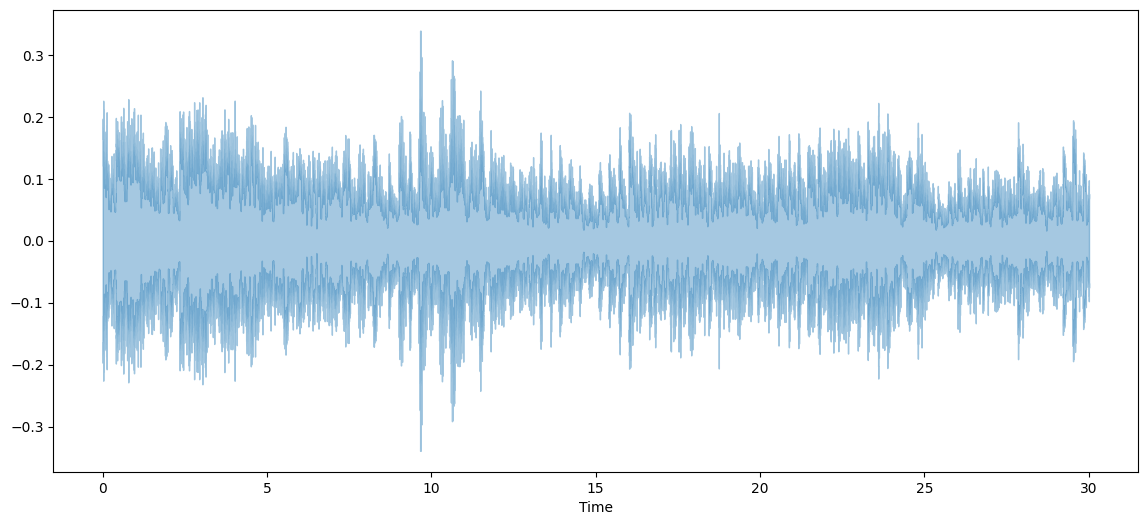

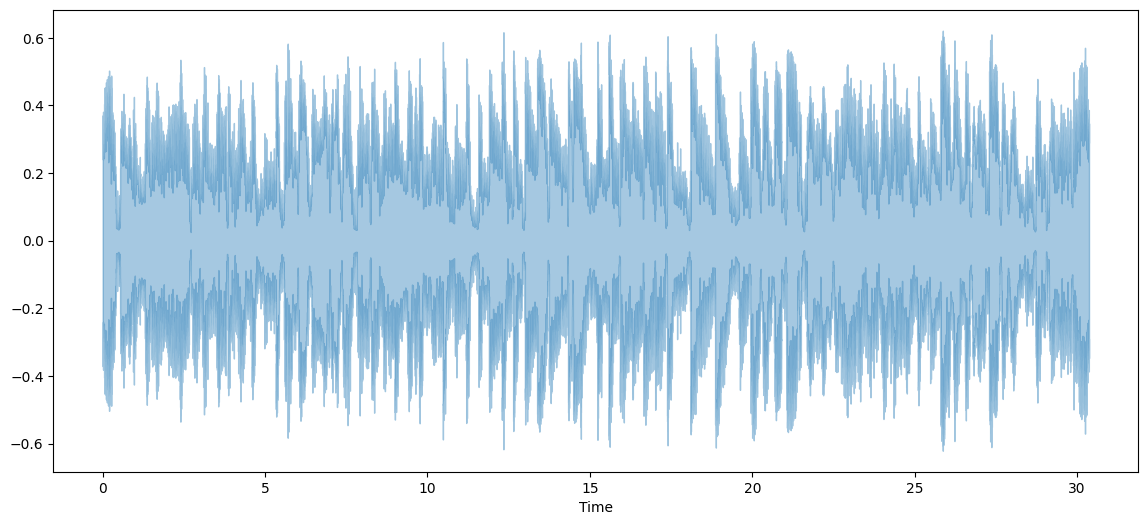

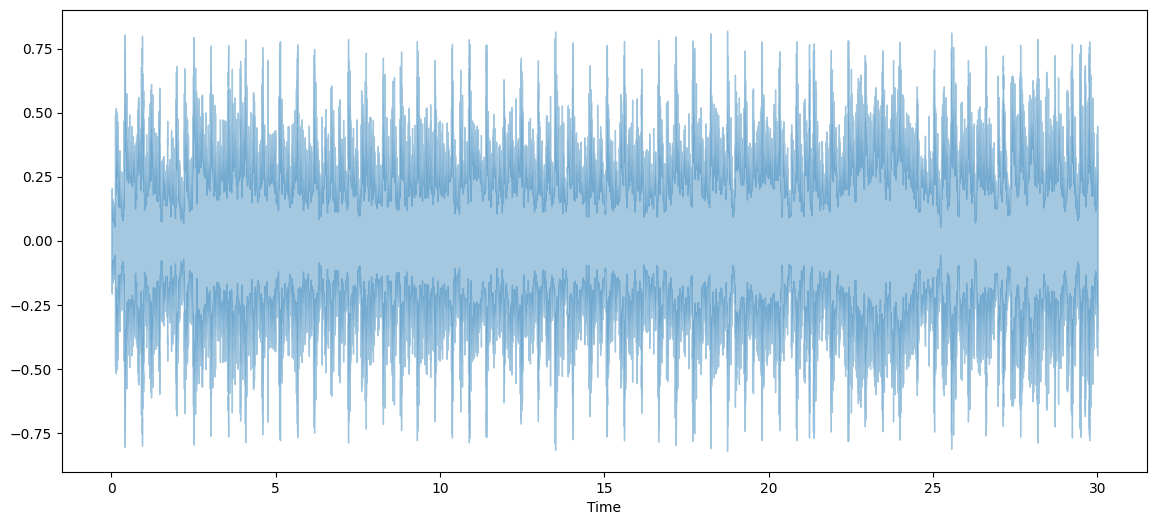

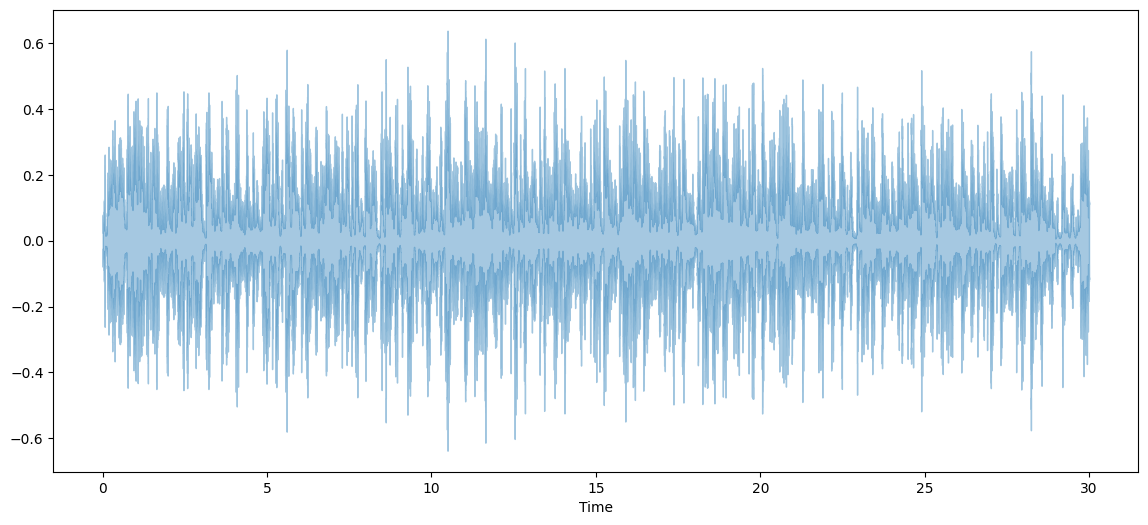

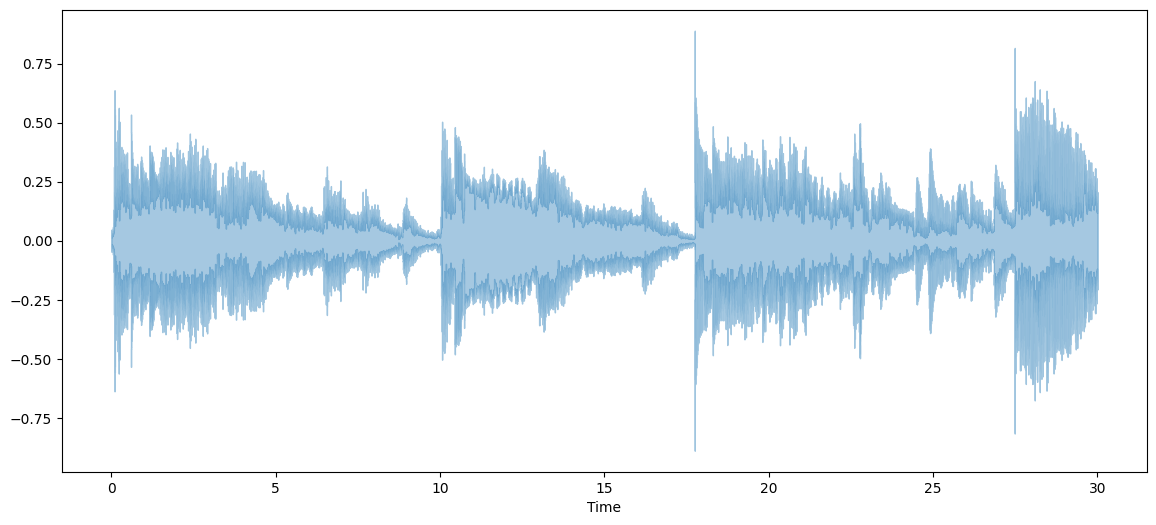

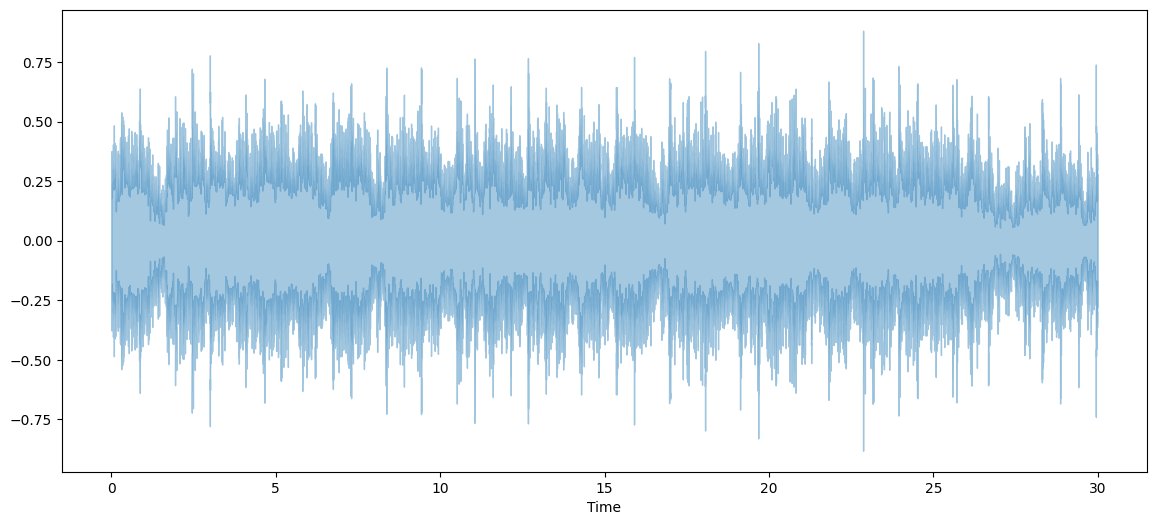

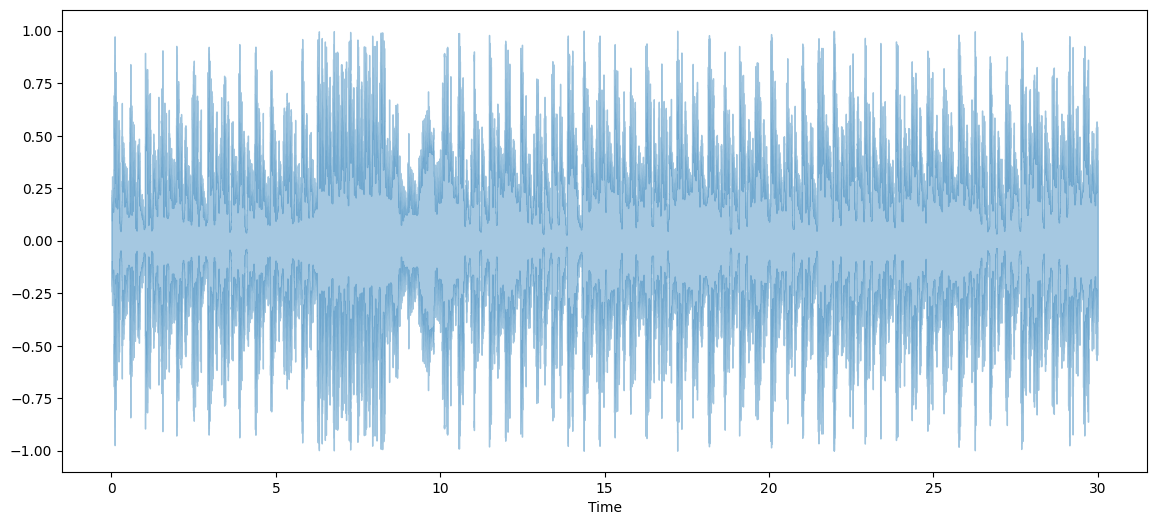

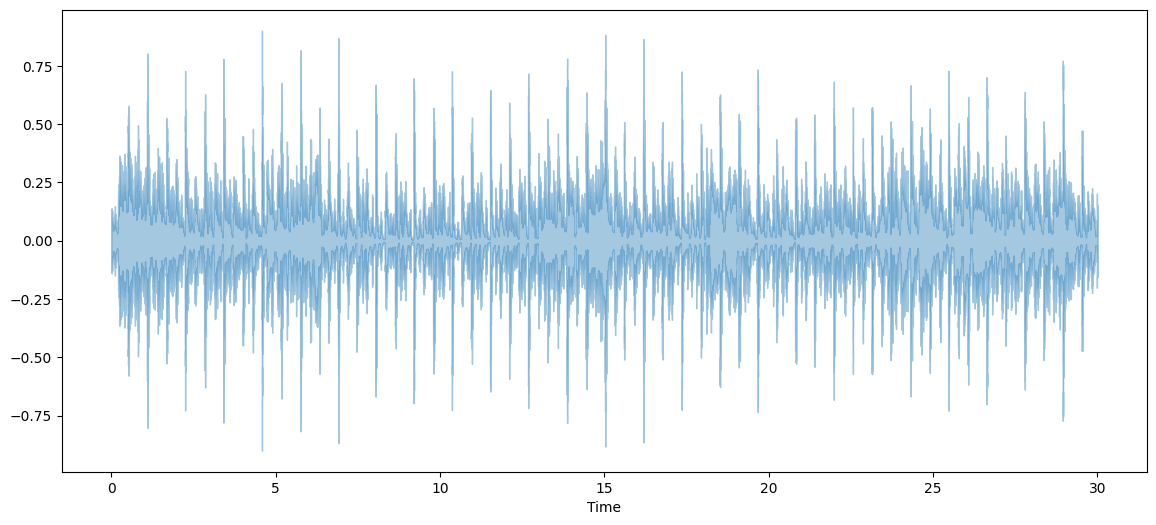

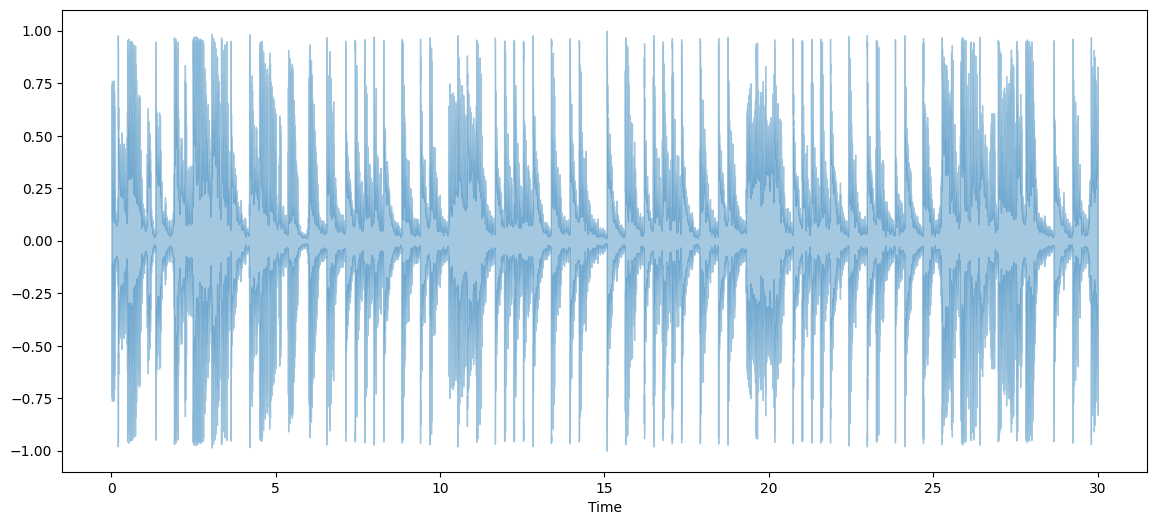

In [ ]:
for i in genre:
    path = f"/content/drive/MyDrive/Data/genres_original/{i}/{i}.00002.wav"
    aud, sr = librosa.load(path)
    spectral_rolloff=librosa.feature.spectral_rolloff(y=aud+0.01,sr=sr)[0]
    plt.figure(figsize=(14,6))
    librosa.display.waveshow(aud,sr=sr,alpha=0.4)

**Chroma feature**

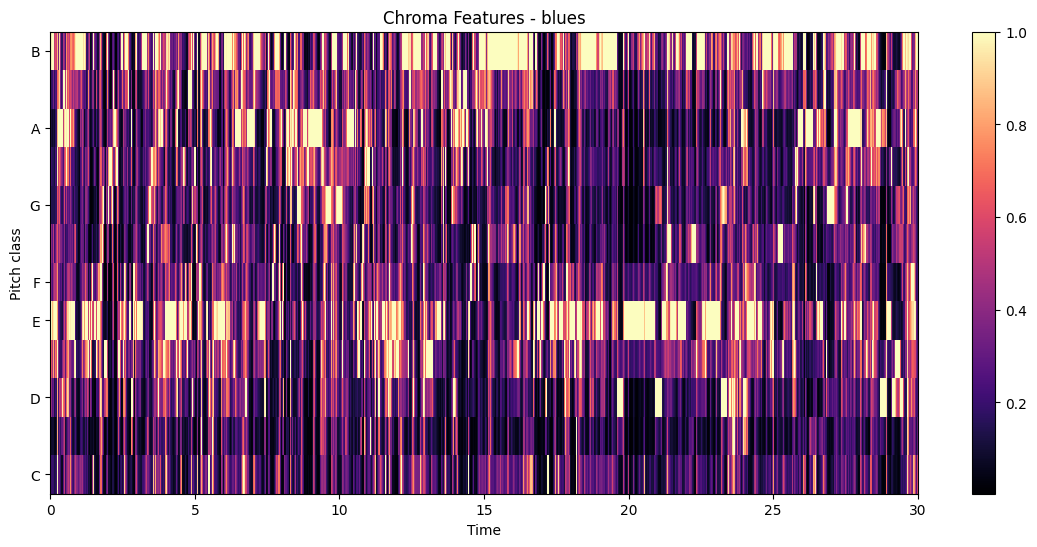

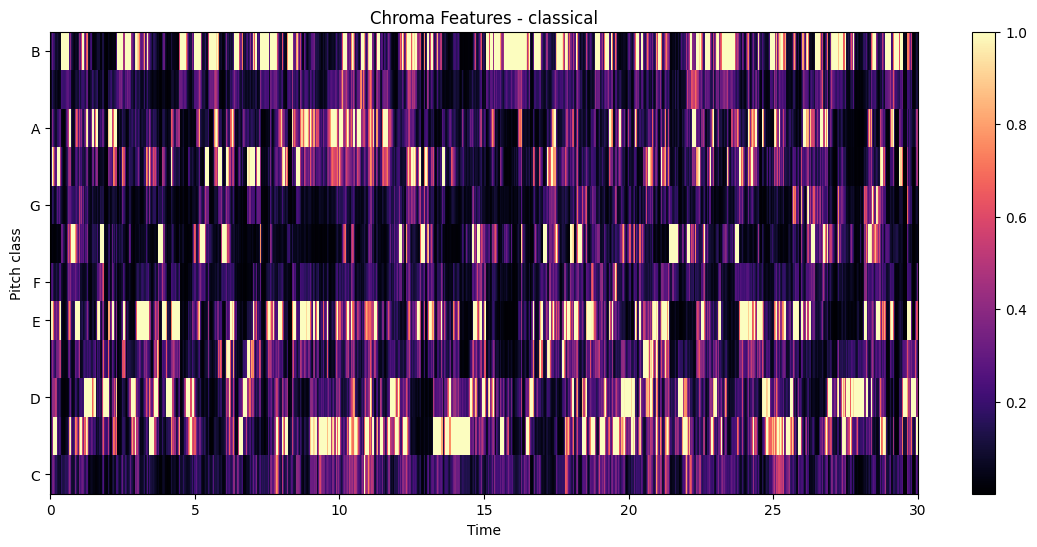

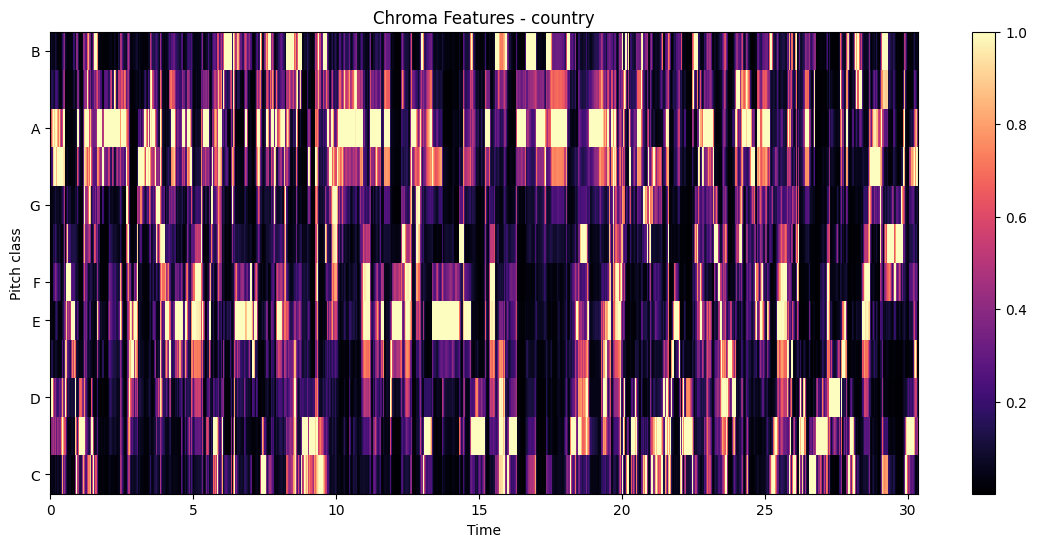

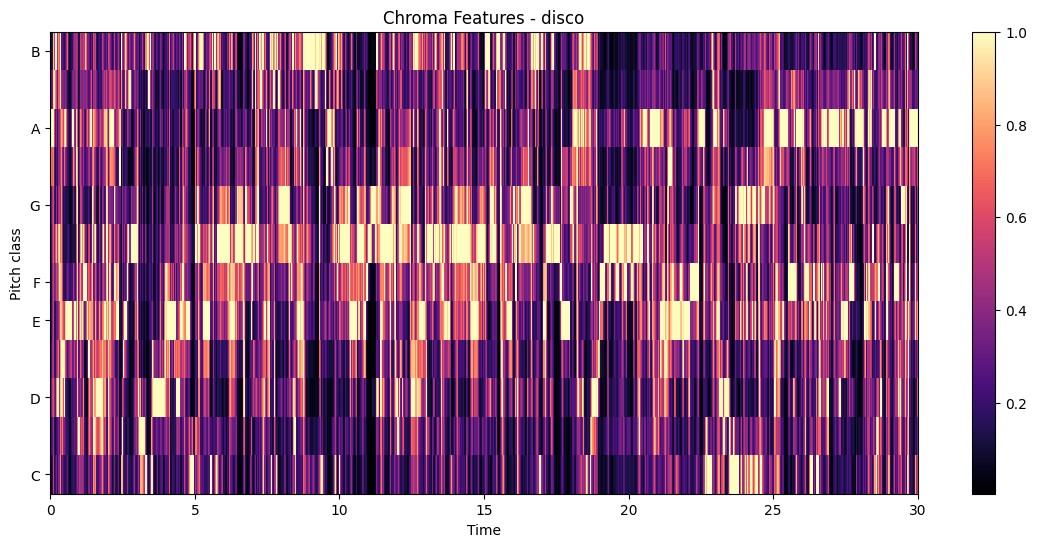

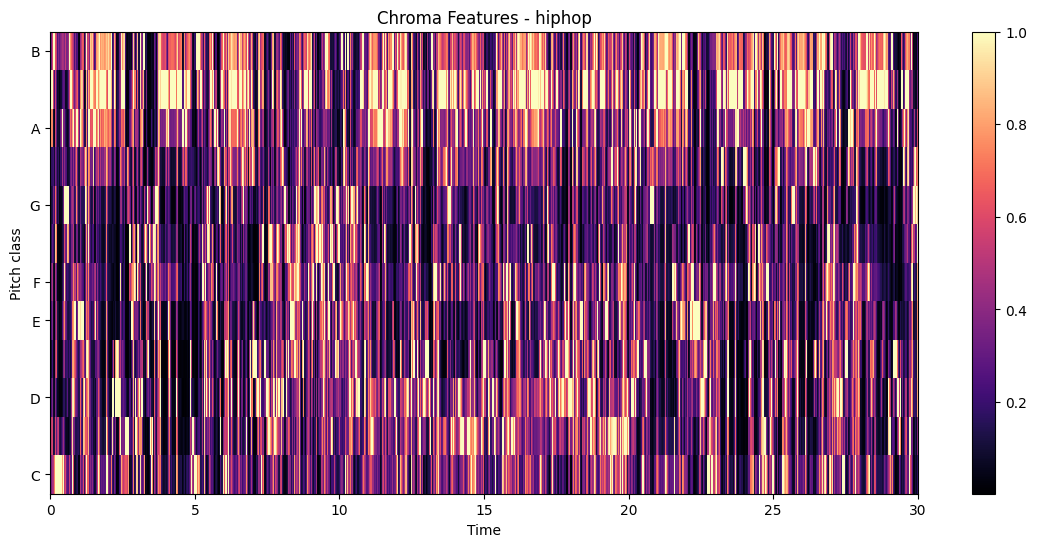

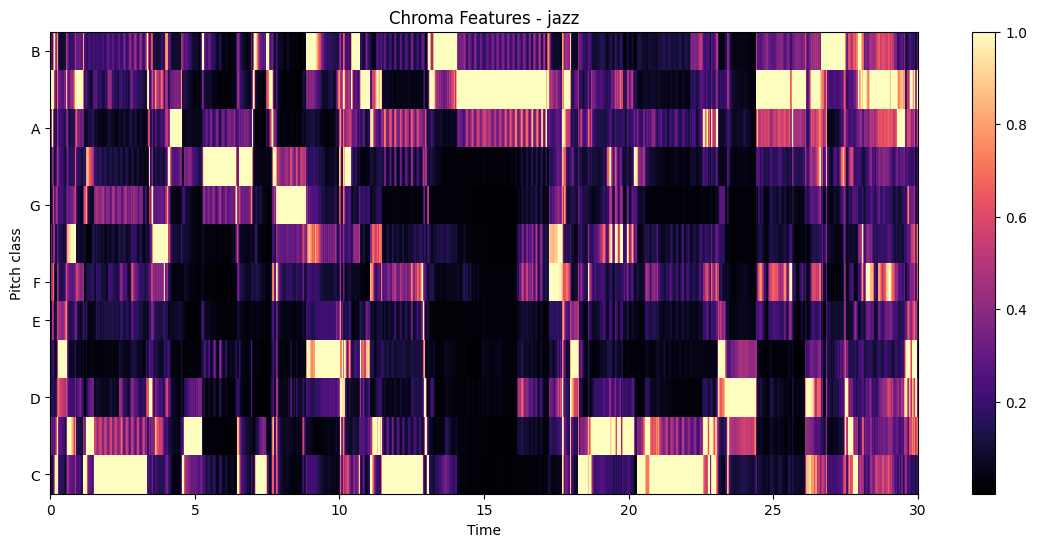

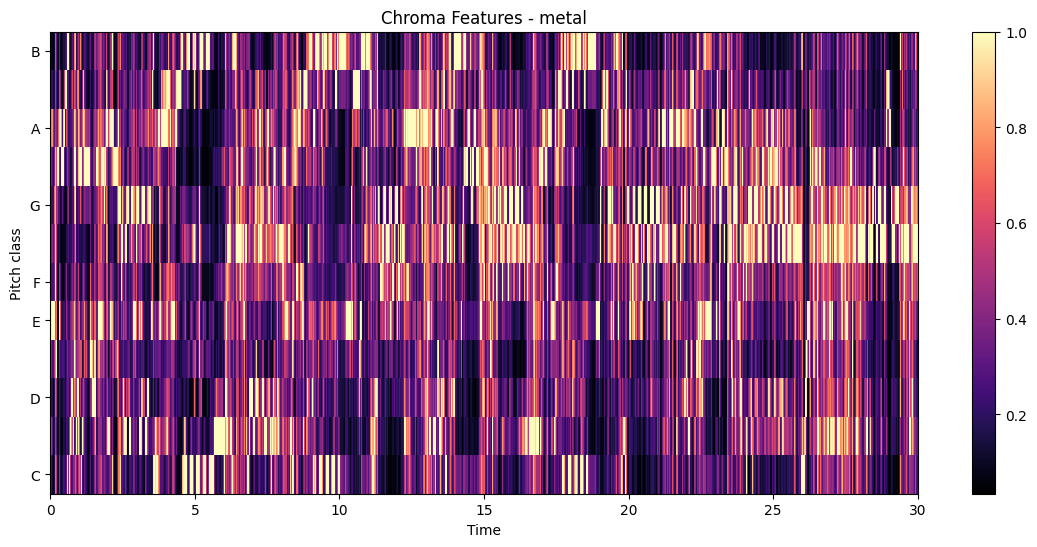

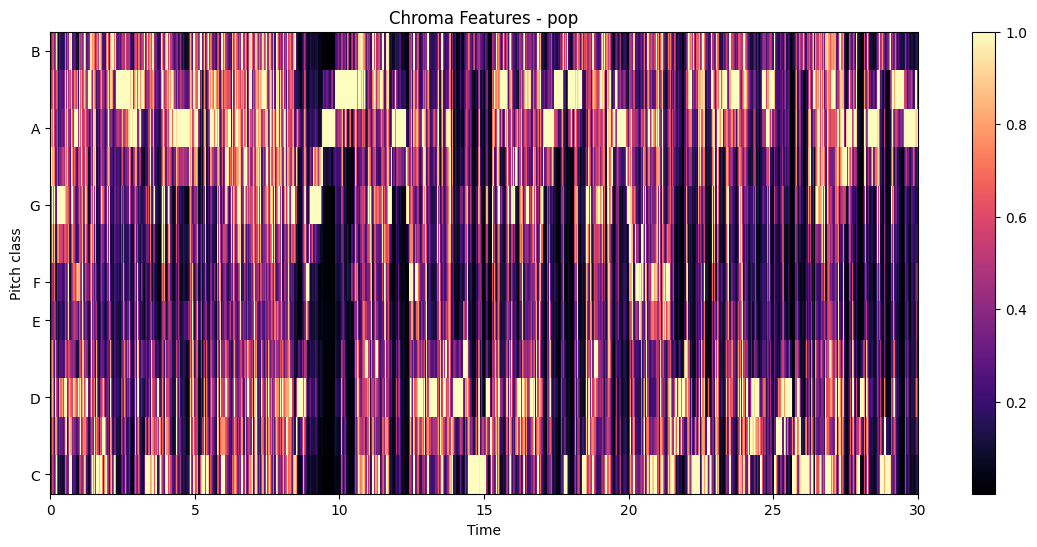

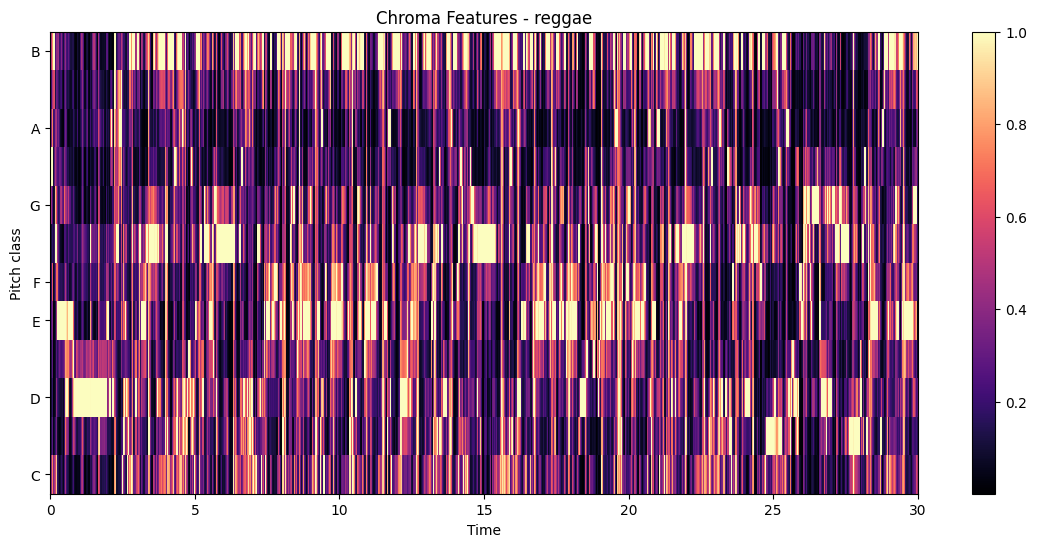

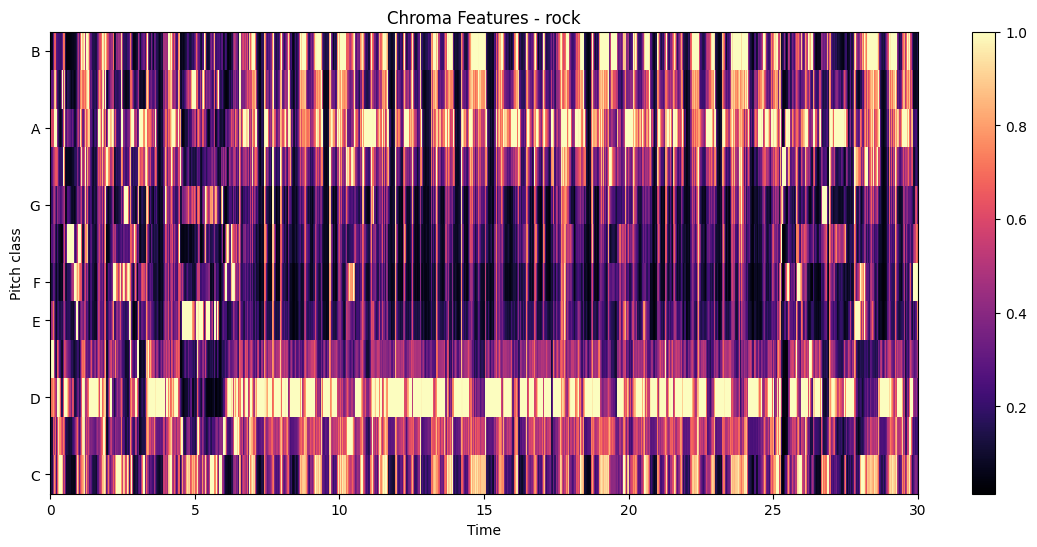

In [ ]:
import librosa.display as lplt
for i in genre:
    path = f"/content/drive/MyDrive/Data/genres_original/{i}/{i}.00002.wav"
    aud, sr = librosa.load(path)
    chroma = librosa.feature.chroma_stft(y=aud,sr=sr)
    plt.figure(figsize=(14,6))
    lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma")
    plt.colorbar()
    plt.title(f"Chroma Features - {i}")
    plt.show()

Zero crossing rate

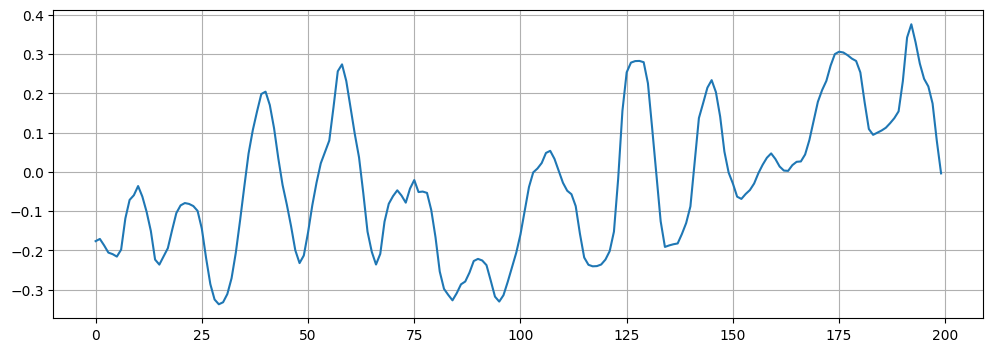

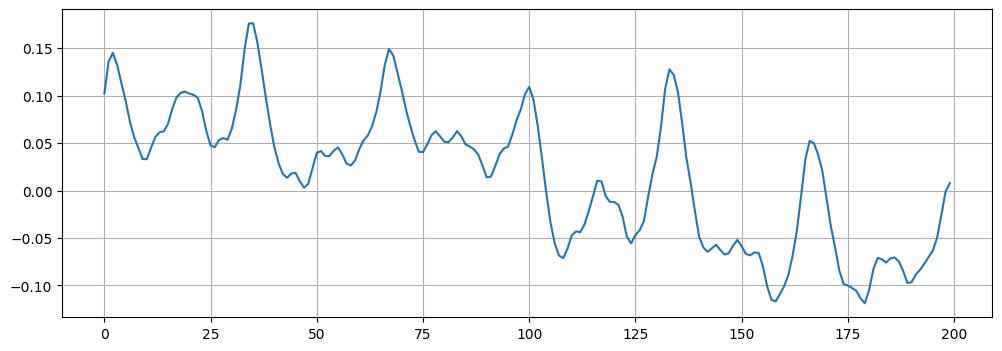

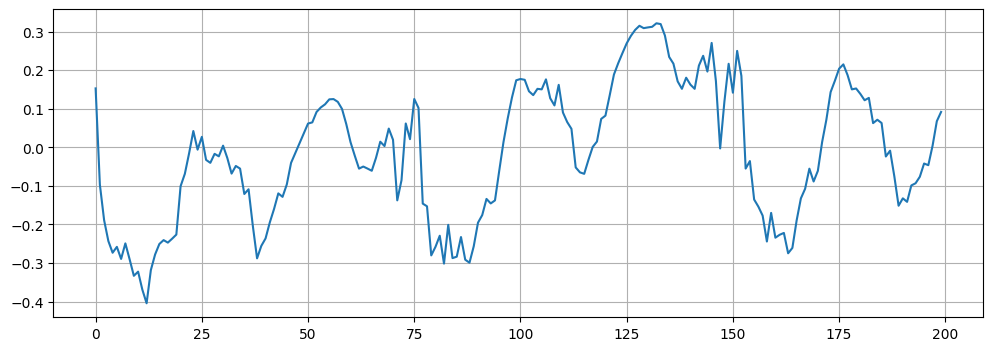

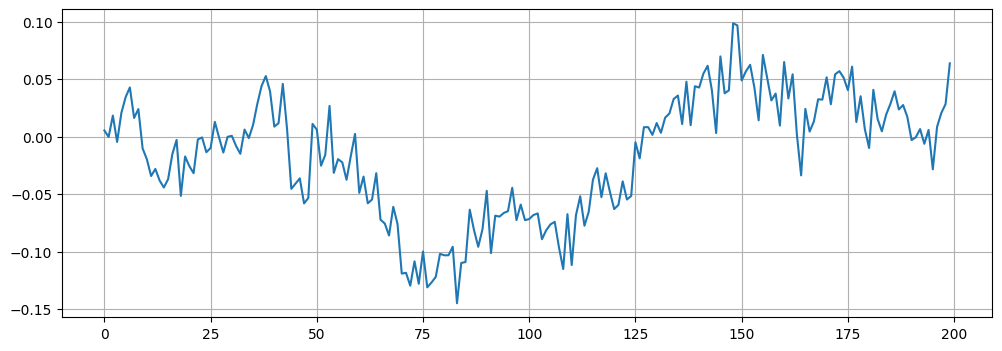

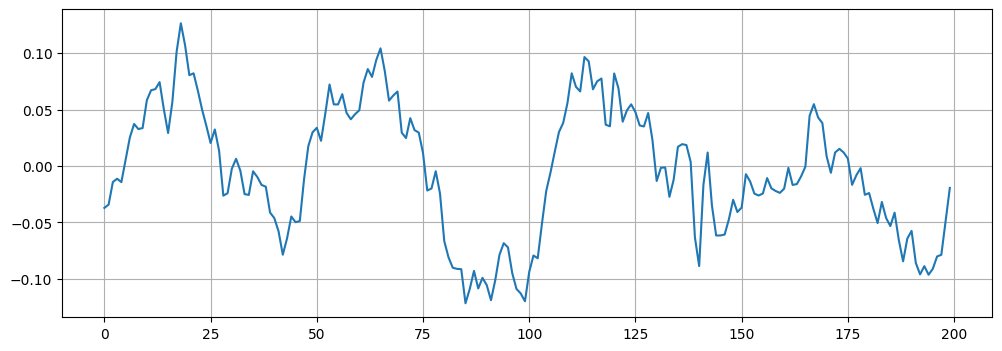

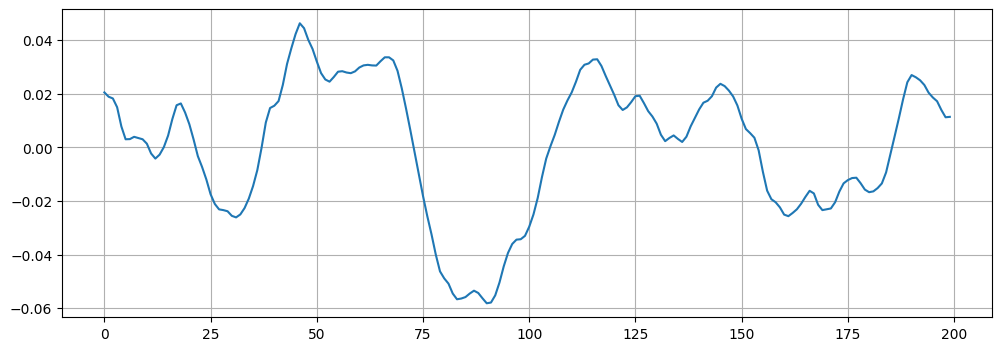

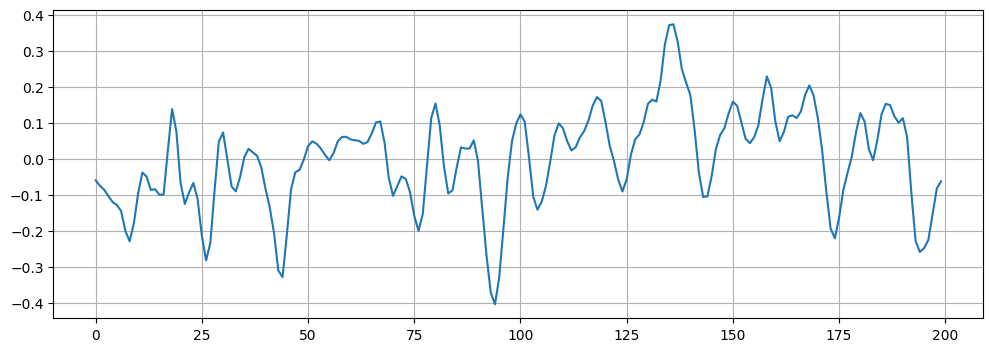

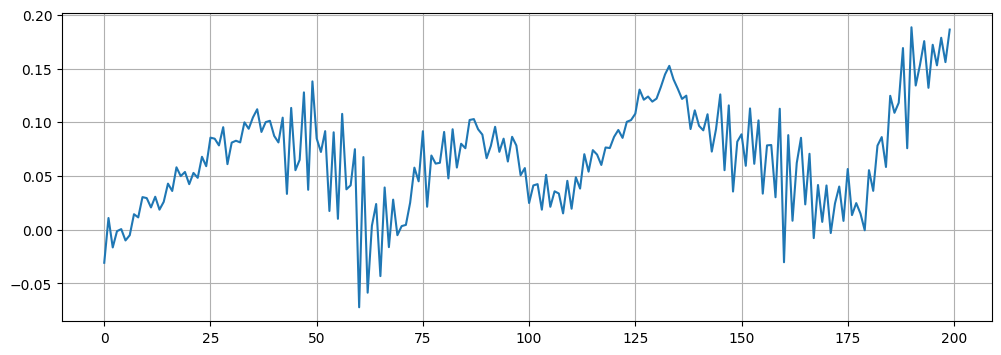

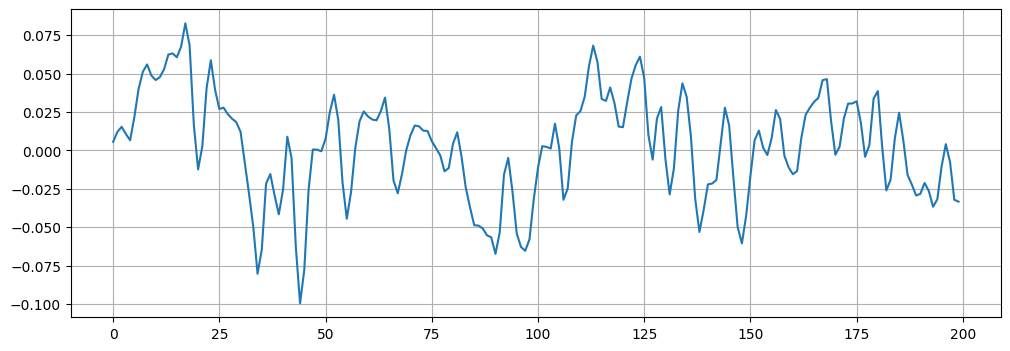

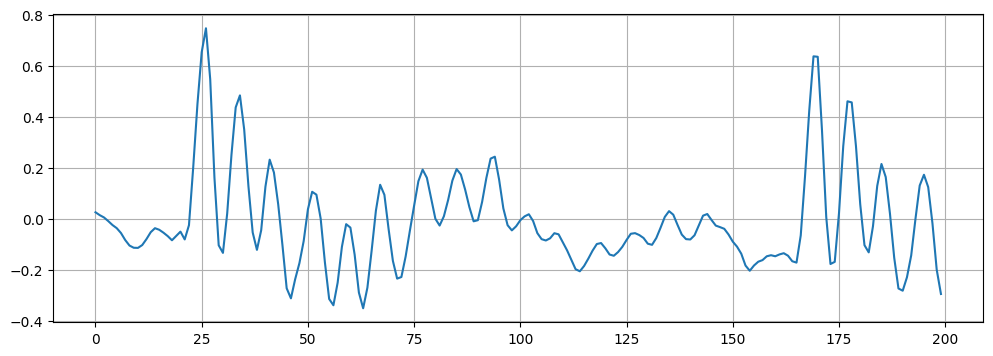

In [ ]:
for i in genre:
    path = f"/content/drive/MyDrive/Data/genres_original/{i}/{i}.00002.wav"
    aud, sr = librosa.load(path)
    start=1000
    end=1200
    plt.figure(figsize=(12,4))
    plt.plot(aud[start:end])
    plt.grid()


In [ ]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the numbert of zero_crossings is :", sum(zero_cross_rate))

the numbert of zero_crossings is : 26


## Data preprocessing

### Feature extraction

In [ ]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [ ]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [ ]:
print(df.iloc[:,:-1])

     length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0    661794          0.350088         0.088757  0.130228  0.002827   
1    661794          0.340914         0.094980  0.095948  0.002373   
2    661794          0.363637         0.085275  0.175570  0.002746   
3    661794          0.404785         0.093999  0.141093  0.006346   
4    661794          0.308526         0.087841  0.091529  0.002303   
..      ...               ...              ...       ...       ...   
995  661794          0.352063         0.080487  0.079486  0.000345   
996  661794          0.398687         0.075086  0.076458  0.000588   
997  661794          0.432142         0.075268  0.081651  0.000322   
998  661794          0.362485         0.091506  0.083860  0.001211   
999  661794          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1

## Scaling the features

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

## Train test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [ ]:
len(y_test)

330

In [ ]:
len(y_train)

670

## Building the model


**1. ANN**

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
def trainModel(model,epochs,optimizer):
    batch_size=128
    model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics='accuracy')
    return model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size)

In [ ]:
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10,activation='softmax'),
])

print(model.summary())
model_history=trainModel(model=model,epochs=1000,optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               30208     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

3/3 [==============================] - 0s 5ms/step - loss: 2.5895 - accuracy: 0.7364
The test loss is  2.589533805847168
The best accuracy is:  73.63636493682861


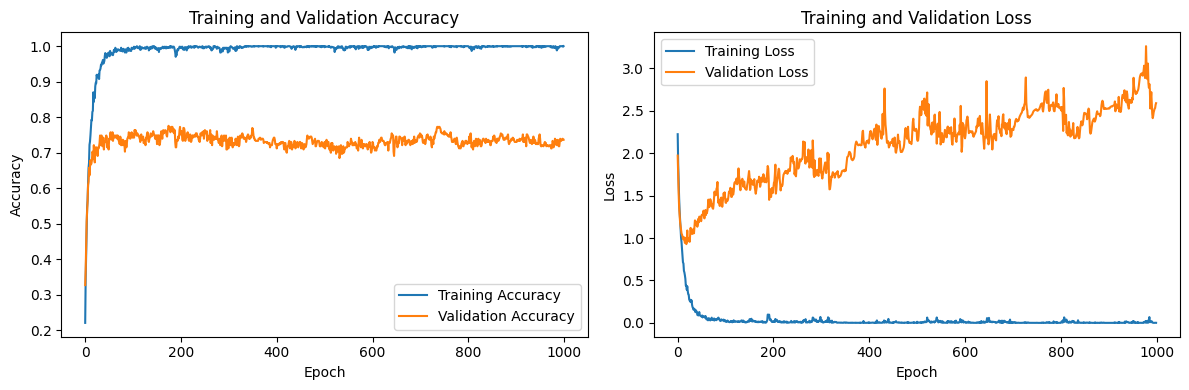

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

ANN with parameter tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Define a learning rate schedule
def lr_schedule(epoch):
    if epoch < 100:
        return 0.001
    elif epoch < 500:
        return 0.0001
    else:
        return 0.00001

def trainModel(model, epochs, X_train, y_train, X_test, y_test):
    batch_size = 128

    # Compile the model with the Adam optimizer and learning rate scheduling
    optimizer = Adam(learning_rate=lr_schedule(0))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Define a learning rate scheduler
    lr_scheduler = LearningRateScheduler(lr_schedule)

    # Train the model with early stopping and learning rate scheduling
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, callbacks=[early_stopping, lr_scheduler])

    return history

model = tf.keras.models.Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(10, activation='softmax'),
])

print(model.summary())

model_history = trainModel(model=model, epochs=1500, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

test_loss,test_acc=model.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)              

**CNN**

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build a CNN model
cnn_model = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history=cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

# Evaluate the CNN model
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)
print("CNN Model Test accuracy:", cnn_test_acc)

Epoch 1/100
11/11 [==============================] - 1s 41ms/step - loss: 2.1206 - accuracy: 0.2776 - val_loss: 1.8373 - val_accuracy: 0.3758
Epoch 2/100
11/11 [==============================] - 0s 23ms/step - loss: 1.5997 - accuracy: 0.4701 - val_loss: 1.5535 - val_accuracy: 0.4667
Epoch 3/100
11/11 [==============================] - 0s 20ms/step - loss: 1.3545 - accuracy: 0.5254 - val_loss: 1.3953 - val_accuracy: 0.5121
Epoch 4/100
11/11 [==============================] - 0s 23ms/step - loss: 1.1237 - accuracy: 0.6194 - val_loss: 1.2383 - val_accuracy: 0.5939
Epoch 5/100
11/11 [==============================] - 0s 21ms/step - loss: 0.9890 - accuracy: 0.6701 - val_loss: 1.2535 - val_accuracy: 0.5636
Epoch 6/100
11/11 [==============================] - 0s 23ms/step - loss: 0.8709 - accuracy: 0.7149 - val_loss: 1.1740 - val_accuracy: 0.5970
Epoch 7/100
11/11 [==============================] - 0s 23ms/step - loss: 0.7862 - accuracy: 0.7403 - val_loss: 1.1352 - val_accuracy: 0.6212
Epoch 

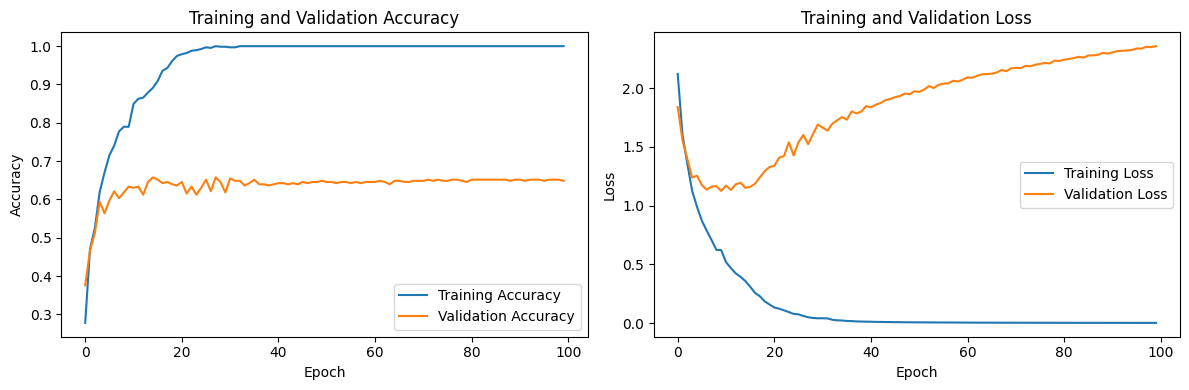

11/11 [==============================] - 0s 4ms/step - loss: 2.3565 - accuracy: 0.6485
CNN Model Test accuracy: 0.6484848260879517


In [ ]:
# Visualize the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the CNN model on the test data
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)
print("CNN Model Test accuracy:", cnn_test_acc)


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 21.0 MB/s eta 0:00:00


CNN hyper parameter tuning

In [ ]:
import kerastuner as kt
from tensorflow import keras

# Define a hyperparameter search space
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(filters=hp.Int('conv1_units', min_value=32, max_value=128, step=32), kernel_size=hp.Int('conv1_kernel', min_value=3, max_value=7), activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(keras.layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.Conv1D(filters=hp.Int('conv2_units', min_value=64, max_value=256, step=64), kernel_size=hp.Int('conv2_kernel', min_value=3, max_value=7), activation='relu'))
    model.add(keras.layers.MaxPooling1D(pool_size=2))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_dir',  # Directory to store tuning results
    project_name='music_genre_cnn_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

# Evaluate the best model
best_test_loss, best_test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test accuracy:", best_test_acc)


Trial 10 Complete [00h 00m 06s]
val_accuracy: 0.6181818246841431

Best val_accuracy So Far: 0.6515151262283325
Total elapsed time: 00h 00m 54s
Epoch 1/100
11/11 [==============================] - 1s 39ms/step - loss: 2.3187 - accuracy: 0.2388 - val_loss: 1.8527 - val_accuracy: 0.3242
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 1.6489 - accuracy: 0.3806 - val_loss: 1.5313 - val_accuracy: 0.4333
Epoch 3/100
11/11 [==============================] - 0s 22ms/step - loss: 1.3507 - accuracy: 0.4836 - val_loss: 1.4158 - val_accuracy: 0.4697
Epoch 4/100
11/11 [==============================] - 0s 23ms/step - loss: 1.1631 - accuracy: 0.5761 - val_loss: 1.3324 - val_accuracy: 0.5394
Epoch 5/100
11/11 [==============================] - 0s 22ms/step - loss: 0.9714 - accuracy: 0.6239 - val_loss: 1.2996 - val_accuracy: 0.5758
Epoch 6/100
11/11 [==============================] - 0s 19ms/step - loss: 0.8049 - accuracy: 0.7194 - val_loss: 1.2747 - val_accuracy: 0.6000
Epoch

**LSTM**

In [ ]:
import kerastuner as kt
from tensorflow import keras

# Define a hyperparameter search space
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(keras.layers.LSTM(units=hp.Int('lstm_units', min_value=32, max_value=128, step=32)))
    model.add(keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(keras.layers.Dense(len(class_list), activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,  # Number of different hyperparameter combinations to try
    directory='my_dir',  # Directory to store tuning results
    project_name='music_genre_lstm_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history=best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64)

# Evaluate the best model
best_test_loss, best_test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test accuracy:", best_test_acc)


Reloading Tuner from my_dir/music_genre_lstm_tuning/tuner0.json
Epoch 1/100
11/11 [==============================] - 6s 261ms/step - loss: 6.8639 - accuracy: 0.0881 - val_loss: 6.7362 - val_accuracy: 0.1303
Epoch 2/100
11/11 [==============================] - 2s 143ms/step - loss: 6.2846 - accuracy: 0.0955 - val_loss: 5.3622 - val_accuracy: 0.0758
Epoch 3/100
11/11 [==============================] - 1s 104ms/step - loss: 4.4042 - accuracy: 0.0791 - val_loss: 3.1848 - val_accuracy: 0.1091
Epoch 4/100
11/11 [==============================] - 1s 90ms/step - loss: 2.7193 - accuracy: 0.0940 - val_loss: 2.3739 - val_accuracy: 0.0939
Epoch 5/100
11/11 [==============================] - 1s 87ms/step - loss: 2.3674 - accuracy: 0.1090 - val_loss: 2.3662 - val_accuracy: 0.0879
Epoch 6/100
11/11 [==============================] - 1s 90ms/step - loss: 2.3330 - accuracy: 0.1060 - val_loss: 2.3259 - val_accuracy: 0.0879
Epoch 7/100
11/11 [==============================] - 1s 95ms/step - loss: 2.3177 

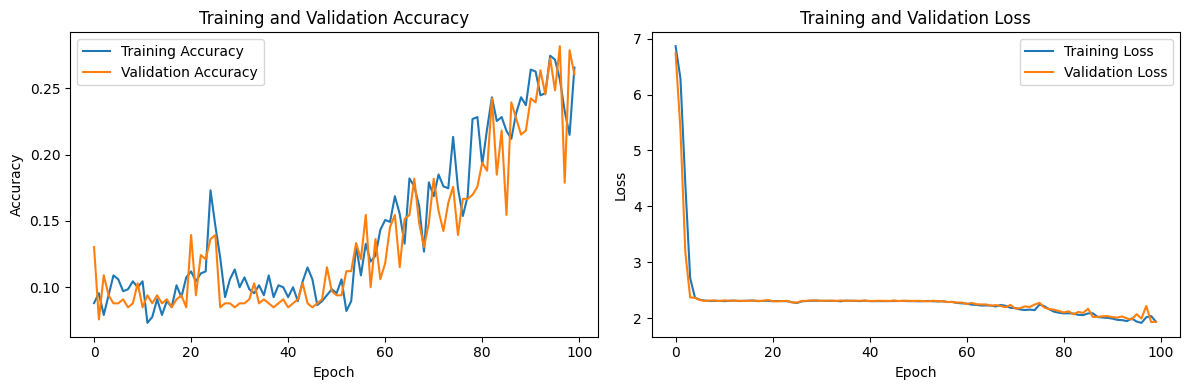

11/11 [==============================] - 0s 20ms/step - loss: 1.9396 - accuracy: 0.2606
Best Model Test accuracy: 0.260606050491333


In [ ]:
# Visualize the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the best model on the test data
best_test_loss, best_test_acc = best_model.evaluate(X_test, y_test)
print("Best Model Test accuracy:", best_test_acc)

**ARSITEKTUR ResNet**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Data/features_30_sec.csv")
data = data.iloc[0:, 1:]
class_list = data.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)
fit = StandardScaler()
X = fit.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'

    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                     batch_size=batch_size)

import numpy as np
from keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Add, Activation, Multiply
from keras.models import Model

# Define model parameters
NUM_SAMPLES = 58
NUM_CHANNELS = 1
NUM_CLASSES = 10

# Input layer
inputs = Input(shape=(NUM_SAMPLES, NUM_CHANNELS))

# 1st block
x = Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(inputs)
x = Activation('relu')(x)
x = Conv1D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

# 2nd block
x = Conv1D(filters=128, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv1D(filters=128, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling1D(pool_size=2, strides=2, padding='same')(x)

# 3rd block
x = Conv1D(filters=256, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)
x = Conv1D(filters=256, kernel_size=3, strides=1, padding='same')(x)
x = Activation('relu')(x)

# LSTM layer
x = LSTM(units=256)(x)

# Output layer
outputs = Dense(units=NUM_CLASSES, activation='softmax')(x)

# Create model
Ensemble_model = Model(inputs=inputs, outputs=outputs, name='Ensemble_model')

Ensemble_model.summary()

Model: "Ensemble_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 58, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 58, 64)            256       
                                                                 
 activation (Activation)     (None, 58, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 58, 64)            12352     
                                                                 
 activation_1 (Activation)   (None, 58, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 29, 64)            0         
 D)                                                              
                                                    

In [ ]:
model_history = trainModel(model=Ensemble_model, epochs=200, optimizer='adam')

Epoch 1/200
6/6 [==============================] - 7s 488ms/step - loss: 2.2534 - accuracy: 0.1500 - val_loss: 2.0264 - val_accuracy: 0.2400
Epoch 2/200
6/6 [==============================] - 2s 384ms/step - loss: 2.0133 - accuracy: 0.2514 - val_loss: 1.8862 - val_accuracy: 0.3500
Epoch 3/200
6/6 [==============================] - 2s 383ms/step - loss: 1.9088 - accuracy: 0.2871 - val_loss: 1.8119 - val_accuracy: 0.3300
Epoch 4/200
6/6 [==============================] - 2s 391ms/step - loss: 1.8013 - accuracy: 0.3343 - val_loss: 1.7554 - val_accuracy: 0.3700
Epoch 5/200
6/6 [==============================] - 4s 699ms/step - loss: 1.7008 - accuracy: 0.3671 - val_loss: 1.6597 - val_accuracy: 0.3967
Epoch 6/200
6/6 [==============================] - 2s 380ms/step - loss: 1.6457 - accuracy: 0.3871 - val_loss: 1.5783 - val_accuracy: 0.4100
Epoch 7/200
6/6 [==============================] - 2s 394ms/step - loss: 1.5584 - accuracy: 0.4214 - val_loss: 1.5373 - val_accuracy: 0.4400
Epoch 8/200
6

In [ ]:
test_loss, test_accuracy = Ensemble_model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

3/3 [==============================] - 0s 75ms/step - loss: 2.6076 - accuracy: 0.6000
The test loss is : 2.607573986053467

The test Accuracy is : 60.00000238418579


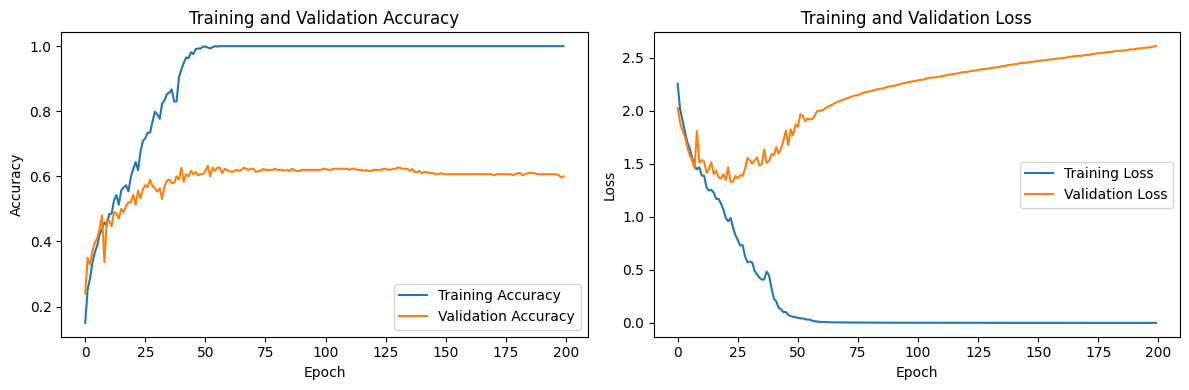

3/3 [==============================] - 0s 67ms/step - loss: 2.6076 - accuracy: 0.6000
The test loss is: 2.607573986053467
The test accuracy is: 60.00000238418579


In [ ]:
# Visualize the training and validation accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the Ensemble model on the test data
test_loss, test_accuracy = Ensemble_model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is:", test_loss)
print("The test accuracy is:", test_accuracy * 100)
